In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

sns.set(style="ticks", color_codes=True)
init_notebook_mode(connected=True)

In [3]:
# Read the CSV file into a DataFrame with the 'latin-1' encoding
df = pd.read_csv('DataCoSupplyChainDataset.csv', encoding='latin-1')

# Identify string columns for re-encoding
#string_cols = df.select_dtypes(include=[object]).columns

# Re-encode string columns to 'utf-8' encoding with 'replace' error handling
#df[string_cols] = df[string_cols].apply(lambda x: x.str.encode('latin-1').str.decode('utf-8', errors='replace'))

# Set display options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Display the first few rows of the DataFrame
df.head()


,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [4]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)', 'Benefit per order', 'Sales per customer', 'Delivery Status', 'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City', 'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id', 'Customer Lname', 'Customer Password', 'Customer Segment', 'Customer State', 'Customer Street', 'Customer Zipcode', 'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market', 'Order City', 'Order Country', 'Order Customer Id', 'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price', 'Order Item Profit Ratio', 'Order Item Quantity', 'Sales', 'Order Item Total', 'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status', 'Order Zipcode', 'Product Card Id', 'Product Category Id', 'Product Description', 'Product Image', 'Product Name', 'Product Price', 'Product Status',
       'shipping d

In [5]:
data=df.copy()
FeatureList=['Type', 'Benefit per order', 'Sales per customer', 
          'Delivery Status', 'Late_delivery_risk', 'Category Name', 'Customer City', 'Customer Country', 
           'Customer Id', 'Customer Segment', 
          'Customer State', 'Customer Zipcode', 'Department Name', 'Latitude', 'Longitude',
          'Market', 'Order City', 'Order Country', 'Order Customer Id', 'order date (DateOrders)', 'Order Id', 
          'Order Item Cardprod Id', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id', 
          'Order Item Product Price', 'Order Item Profit Ratio', 'Order Item Quantity', 'Sales', 'Order Item Total', 
          'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status', 'Order Zipcode', 'Product Card Id',
          'Product Category Id', 'Product Description', 'Product Image', 'Product Name', 'Product Price', 'Product Status',
       'shipping date (DateOrders)', 'Shipping Mode']

df1=df[FeatureList]
df1.head()

,Type,Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Zipcode,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,91.250000,314.640015,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,20755,Consumer,PR,725.0,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,-249.089996,311.359985,Late delivery,1,Sporting Goods,Caguas,Puerto Rico,19492,Consumer,PR,725.0,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,-247.779999,309.720001,Shipping on time,0,Sporting Goods,San Jose,EE. UU.,19491,Consumer,CA,95125.0,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,22.860001,304.809998,Advance shipping,0,Sporting Goods,Los Angeles,EE. UU.,19490,Home Office,CA,90027.0,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,134.210007,298.250000,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,19489,Corporate,PR,725.0,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [6]:
# Group by 'Delivery Status' and count the number of orders
data_delivery_status = df1.groupby('Delivery Status')['Order Id'].count().reset_index(name='Number of Orders')

# Sort the data by 'Number of Orders' in descending order
data_delivery_status = data_delivery_status.sort_values(by='Number of Orders', ascending=False)

# Create a bar plot using Plotly Express with different colors and graph style
fig = px.bar(data_delivery_status, x='Delivery Status', y='Number of Orders',
             color='Number of Orders', labels={'Delivery Status': 'Delivery Status', 'Number of Orders': 'Number of Orders'},
             color_continuous_scale='Viridis', template='plotly_dark')

# Show the plot
fig.show()

In [7]:
# Group by 'Delivery Status' and 'Order Region' and count the number of orders
data_delivery_status_region = df1.groupby(['Delivery Status', 'Order Region'])['Order Id'].count().reset_index(name='Number of Orders')

# Sort the data by 'Number of Orders' in descending order
data_delivery_status_region = data_delivery_status_region.sort_values(by='Number of Orders', ascending=False)

# Create a bar plot using Plotly Express with different colors and graph style
fig = px.bar(data_delivery_status_region, x='Delivery Status', y='Number of Orders',
             color='Order Region', template='plotly_dark')

# Show the plot
fig.show()

In [8]:
# Convert 'Customer Id' to string
df1['Customer_ID_STR'] = df1['Customer Id'].astype(str)

# Group by 'Customer_ID_STR' and count the number of orders
data_customers = df1.groupby('Customer_ID_STR')['Order Id'].count().reset_index(name='Number of Orders')

# Sort the data by 'Number of Orders' in descending order
data_customers = data_customers.sort_values(by='Number of Orders', ascending=False)

# Create a copy of the top 50 rows of the data_customers DataFrame
data_customers_top50 = data_customers.head(50).copy()

# Create a bar plot using Plotly Express with different colors and graph style
fig = px.bar(data_customers_top50, x='Number of Orders', y='Customer_ID_STR',
             color='Number of Orders', template='plotly_dark')

# Show the plot
fig.show()

/var/folders/1s/syn2ktxj6999njhtgf9hpndh0000gn/T/ipykernel_28051/55096873.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [27]:
# Group by 'Customer Segment' and count the number of orders
data_Customer_Segment = df1.groupby('Customer Segment')['Order Id'].count().reset_index(name='Number of Orders')

# Sort the data by 'Number of Orders' in descending order
data_Customer_Segment = data_Customer_Segment.sort_values(by='Number of Orders', ascending=False)

# Create a pie chart using Plotly Express with modified height and width
fig = px.pie(data_Customer_Segment, values='Number of Orders', names='Customer Segment',
             title='Number of Orders of different Customer Segments',
             width=800, height=600, color_discrete_sequence=px.colors.sequential.RdBu)

# Show the plot
fig.show()

In [29]:
# Group by 'Category Name' and count the number of orders
data_Category_Name = df1.groupby('Category Name')['Order Id'].count().reset_index(name='Number of Orders')

# Sort the data by 'Number of Orders' in ascending order
data_Category_Name = data_Category_Name.sort_values(by='Number of Orders', ascending=True)

# Create a bar chart using Plotly Express with previous graph style
fig = px.bar(data_Category_Name, x='Number of Orders', y='Category Name', color='Number of Orders',
             template='plotly_dark')

# Show the plot
fig.show()

In [30]:
# Group by 'Order Region' and count the number of orders
data_Region = df1.groupby('Order Region')['Order Id'].count().reset_index(name='Number of Orders')

# Sort the data by 'Number of Orders' in ascending order
data_Region = data_Region.sort_values(by='Number of Orders', ascending=True)

# Create a bar chart using Plotly Express with the 'plotly_dark' style
fig = px.bar(data_Region, x='Number of Orders', y='Order Region', color='Number of Orders',
             template='plotly_dark')

# Show the plot
fig.show()

In [31]:
# Group by 'Order Country' and count the number of orders
data_countries = df1.groupby('Order Country')['Order Id'].count().reset_index(name='Number of Orders')

# Sort the data by 'Number of Orders' in ascending order
data_countries = data_countries.sort_values(by='Number of Orders', ascending=True)

# Create a bar chart using Plotly Express with the 'plotly_dark' style
fig = px.bar(data_countries.head(20), x='Number of Orders', y='Order Country', color='Number of Orders',
             template='plotly_dark')

# Show the plot
fig.show()

In [32]:
# Group by 'Order Country' and 'Order City' and sum the 'Order Profit Per Order'
df_geo = df1.groupby(['Order Country', 'Order City'])['Order Profit Per Order'].sum().reset_index(name='Profit of Orders')

# Sort the data by 'Profit of Orders' in descending order
df_geo = df_geo.sort_values(by='Profit of Orders', ascending=False)

# Display the DataFrame
df_geo


,Order Country,Order City,Profit of Orders
3260,República Dominicana,Santo Domingo,51111.670019
1492,Estados Unidos,New York City,47889.759868
2152,Honduras,Tegucigalpa,40973.640056
1430,Estados Unidos,Los Angeles,38014.360024
2837,Nicaragua,Managua,34319.950107
...,...,...,...
738,China,Dalian,-1588.609972
3,Afganistán,Kandahar,-1681.830001
3110,Reino Unido,Dudley,-1742.079996
2463,Italia,Cerignola,-2212.530012


In [36]:
fig = px.choropleth(df_geo, locationmode='country names', locations='Order Country',
                    color='Profit of Orders', hover_name='Order Country',
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.show()


In [37]:
# Group by 'Order Country' and sum the 'Sales'
df_sales_country = df1.groupby('Order Country')['Sales'].sum().reset_index(name='Sales of Orders')

# Sort the data by 'Sales of Orders' in descending order
df_sales_country = df_sales_country.sort_values(by='Sales of Orders', ascending=False)

# Create a bar chart using Plotly Express with the 'plotly_dark' style
fig = px.bar(df_sales_country.head(10), x='Sales of Orders', y='Order Country', color='Sales of Orders',
             template='plotly_dark')

# Show the plot
fig.show()

In [39]:
# Group by 'Product Name' and sum the 'Sales'
df_sales_product = df1.groupby('Product Name')['Sales'].sum().reset_index(name='Sales of Orders')

# Sort the data by 'Sales of Orders' in descending order
df_sales_product = df_sales_product.sort_values(by='Sales of Orders', ascending=False)

# Create a bar chart using Plotly Express with the 'plotly_dark' style
fig = px.bar(df_sales_product.head(10), x='Sales of Orders', y='Product Name', color='Sales of Orders',
             template='plotly_dark')

# Show the plot
fig.show()

In [40]:
# Group by 'Product Name' and 'Delivery Status' and sum the 'Sales'
df_sales_pd = df1.groupby(['Product Name', 'Delivery Status'])['Sales'].sum().reset_index(name='Sales of Orders')

# Sort the data by 'Sales of Orders' in descending order
df_sales_pd = df_sales_pd.sort_values(by='Sales of Orders', ascending=False)

# Create a bar chart using Plotly Express with the 'plotly_dark' style
fig = px.bar(df_sales_pd.head(10), x='Sales of Orders', y='Product Name', color='Delivery Status',
             template='plotly_dark')

# Show the plot
fig.show()

In [41]:
# Group by 'Product Name' and 'Order Region' and sum the 'Sales'
df_sales_pr = df1.groupby(['Product Name', 'Order Region'])['Sales'].sum().reset_index(name='Sales of Orders')

# Sort the data by 'Sales of Orders' in descending order
df_sales_pr = df_sales_pr.sort_values(by='Sales of Orders', ascending=False)

# Create a bar chart using Plotly Express with the 'plotly_dark' style
fig = px.bar(df_sales_pr.head(10), x='Sales of Orders', y='Product Name', color='Order Region',
             template='plotly_dark')

# Show the plot
fig.show()

In [43]:
# Group by 'Category Name' and sum the 'Sales'
df_sales_category = df1.groupby('Category Name')['Sales'].sum().reset_index(name='Sales of Orders')

# Sort the data by 'Sales of Orders' in descending order
df_sales_category = df_sales_category.sort_values(by='Sales of Orders', ascending=False)

# Create a bar chart using Plotly Express with the 'plotly_dark' style
fig = px.bar(df_sales_category.head(10), x='Sales of Orders', y='Category Name', color='Sales of Orders',
             template='plotly_dark')

# Show the plot
fig.show()


In [44]:
# Group by 'Type' and sum the 'Sales'
df_sales_type = df1.groupby('Type')['Sales'].sum().reset_index(name='Sales of Orders')

# Sort the data by 'Sales of Orders' in descending order
df_sales_type = df_sales_type.sort_values(by='Sales of Orders', ascending=False)

# Create a bar chart using Plotly Express with the 'plotly_dark' style
fig = px.bar(df_sales_type.head(10), x='Sales of Orders', y='Type', color='Sales of Orders',
             template='plotly_dark')

# Show the plot
fig.show()

In [45]:
df_sales_tp = df1.groupby(['Type', 'Product Name'])['Sales'].sum().reset_index(name='Sales of Orders')

# Sort the data by 'Sales of Orders' in descending order
df_sales_tp = df_sales_tp.sort_values(by='Sales of Orders', ascending=False)

# Create a bar chart using Plotly Express with the 'plotly_dark' style
fig = px.bar(df_sales_tp.head(10), x='Sales of Orders', y='Type', color='Product Name',
             template='plotly_dark')

# Show the plot
fig.show()

In [46]:
import datetime as dt

data_orderdate = df1[['order date (DateOrders)', 'Sales']]
data_orderdate['order_date'] = pd.to_datetime(data_orderdate['order date (DateOrders)'])

/var/folders/pv/ywysx3yj0vd1505d85gmbs4h0000gn/T/ipykernel_74602/2634097524.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [47]:
data_orderdate["Quarter"] = data_orderdate['order_date'].dt.quarter
data_orderdate["Month"] = data_orderdate['order_date'].dt.month
data_orderdate["Year"] = data_orderdate['order_date'].dt.year

/var/folders/pv/ywysx3yj0vd1505d85gmbs4h0000gn/T/ipykernel_74602/3642751865.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/pv/ywysx3yj0vd1505d85gmbs4h0000gn/T/ipykernel_74602/3642751865.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/pv/ywysx3yj0vd1505d85gmbs4h0000gn/T/ipykernel_74602/3642751865.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [48]:
data_orderdate['YearStr'] = data_orderdate['Year'].astype(str)

# Group by 'YearStr' and calculate the sum of 'Sales' for each year
df_sales_year = data_orderdate.groupby('YearStr')['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by='Sales of Orders', ascending=False)

# Create a bar chart using Plotly Express with the 'plotly_dark' style
fig = px.bar(df_sales_year, x='Sales of Orders', y='YearStr', color='Sales of Orders', template='plotly_dark')

# Show the plot
fig.show()

/var/folders/pv/ywysx3yj0vd1505d85gmbs4h0000gn/T/ipykernel_74602/332475454.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [49]:
data_orderdate['QuarterStr'] = data_orderdate['Quarter'].astype(str)

# Group by 'YearStr' and 'QuarterStr' and calculate the sum of 'Sales' for each quarter
df_sales_quarter = data_orderdate.groupby(['YearStr', 'QuarterStr'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by='Sales of Orders', ascending=False)

# Create a bar chart using Plotly Express with the 'plotly_dark' style
fig = px.bar(df_sales_quarter, x='Sales of Orders', y='QuarterStr', color='YearStr', template='plotly_dark')

# Show the plot
fig.show()

/var/folders/pv/ywysx3yj0vd1505d85gmbs4h0000gn/T/ipykernel_74602/2272883271.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [50]:
data_orderdate['MonthStr'] = data_orderdate['Month'].astype(str)

# Group by 'QuarterStr' and 'MonthStr' and calculate the sum of 'Sales' for each month within each quarter
df_sales_m = data_orderdate.groupby(['QuarterStr', 'MonthStr'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by='Sales of Orders', ascending=False)

# Create a bar chart using Plotly Express with the 'plotly_dark' style
fig = px.bar(df_sales_m, x='Sales of Orders', y='QuarterStr', color='MonthStr', template='plotly_dark')

# Show the plot
fig.show()

/var/folders/pv/ywysx3yj0vd1505d85gmbs4h0000gn/T/ipykernel_74602/2566978170.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [51]:
data = df1.copy()
data['SUSPECTED_FRAUD'] = np.where(data['Order Status'] == 'SUSPECTED_FRAUD', 1, 0)

In [52]:
def Labelencoder_feature(x):
    le = LabelEncoder()
    x_encoded = le.fit_transform(x)
    return x_encoded

In [53]:
# Create the features variable by dropping the 'SUSPECTED_FRAUD' and 'Order Status' columns
features = data.drop(columns=['SUSPECTED_FRAUD', 'Order Status'])

# Create the target variable by selecting only the 'SUSPECTED_FRAUD' column
target = data['SUSPECTED_FRAUD']


In [54]:
features.isnull().sum()

Type                               0
Benefit per order                  0
Sales per customer                 0
Delivery Status                    0
Late_delivery_risk                 0
Category Name                      0
Customer City                      0
Customer Country                   0
Customer Id                        0
Customer Segment                   0
Customer State                     0
Customer Zipcode                   3
Department Name                    0
Latitude                           0
Longitude                          0
Market                             0
Order City                         0
Order Country                      0
Order Customer Id                  0
order date (DateOrders)            0
Order Id                           0
Order Item Cardprod Id             0
Order Item Discount                0
Order Item Discount Rate           0
Order Item Id                      0
Order Item Product Price           0
Order Item Profit Ratio            0
O

In [56]:
from sklearn.preprocessing import LabelEncoder
# Apply the Labelencoder_feature function to encode categorical features in the features DataFrame
features = features.apply(Labelencoder_feature)

# Display the first few rows of the updated features DataFrame
features.head()

,Type,Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Zipcode,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,Customer_ID_STR
0,1,18934,2568,0,0,40,66,1,20649,0,36,7,4,3624,4420,3,331,70,20649,5961,65749,114,426,4,180516,62,140,0,166,2568,18934,15,475,609,114,47,0,78,78,62,0,27149,3,11912
1,3,2272,2559,1,1,40,66,1,19386,0,36,7,4,5522,4419,3,391,69,19386,1147,64486,114,498,5,179253,62,44,0,166,2559,2272,13,841,609,114,47,0,78,78,62,0,2209,3,10509
2,0,2293,2555,3,0,40,452,0,19385,0,5,941,4,9146,232,3,391,69,19385,1146,64485,114,529,6,179252,62,44,0,166,2555,2293,13,841,609,114,47,0,78,78,62,0,1980,3,10508
3,1,13638,2546,0,0,40,285,0,19384,2,5,720,4,8467,663,3,3226,8,19384,1145,64484,114,600,7,179251,62,119,0,166,2546,13638,11,835,609,114,47,0,78,78,62,0,1752,3,10507
4,2,20599,2526,0,0,40,66,1,19383,1,36,7,4,3783,4421,3,3226,8,19383,1144,64483,114,682,8,179250,62,156,0,166,2526,20599,11,835,609,114,47,0,78,78,62,0,1528,3,10505


In [57]:
# Concatenate the features and target DataFrames
data1 = pd.concat([features, target], axis=1)

In [58]:
corr = data1.corr()

# Initialize an array to keep track of selected columns
columns = np.full((corr.shape[0],), True, dtype=bool)

# Iterate through the correlation matrix
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        # Check if the correlation between columns i and j is above the threshold
        if corr.iloc[i, j] >= 0.8:
            # If column j is not already marked as False, mark it as False
            if columns[j]:
                columns[j] = False

# Select the columns that are not highly correlated with each other
selected_columns = data1.columns[columns]


In [59]:
features1 = features[['Type', 'Benefit per order', 'Sales per customer', 'Delivery Status', 'Late_delivery_risk', 
                    'Category Name', 'Customer City', 'Customer Country', 'Customer Id', 'Customer Segment', 
                    'Customer State', 'Customer Zipcode', 'Department Name', 'Latitude', 'Longitude', 'Market', 
                    'Order City', 'Order Country', 'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
                    'Order Item Discount', 'Order Item Discount Rate', 'Order Item Product Price', 'Order Item Quantity',
                    'Order Region', 'Order State', 'Order Zipcode', 'Product Description', 'Product Image', 
                    'Product Status', 'Shipping Mode', 'Customer_ID_STR']]


In [60]:
from scipy.stats import pearsonr

corre = pd.DataFrame()

for i in features1.columns:
    corre[i] = pearsonr(target, features1[i])

corre


/usr/local/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning:

An input array is constant; the correlation coefficient is not defined.

/usr/local/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning:

An input array is constant; the correlation coefficient is not defined.



,Type,Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Zipcode,Department Name,Latitude,Longitude,Market,Order City,Order Country,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Quantity,Order Region,Order State,Order Zipcode,Product Description,Product Image,Product Status,Shipping Mode,Customer_ID_STR
0,0.202094,-0.002586,-0.000807,0.128768,-0.167158,-0.002104,-0.003561,0.006756,0.009375,-0.005935,0.005670,-0.005600,-0.000837,-0.004709,0.005100,-0.000293,-0.005889,-0.004928,0.003002,0.002222,-0.001109,0.002893,0.002271,0.000315,-0.000757,0.009077,-0.006105,0.004666,NaN,-0.000741,NaN,-0.004641,0.000490
1,0.000000,0.271923,0.731807,0.000000,0.000000,0.371352,0.130283,0.004098,0.000068,0.011686,0.016001,0.017337,0.722187,0.045427,0.030231,0.900798,0.012344,0.036290,0.202217,0.345187,0.637360,0.219059,0.334515,0.893383,0.747677,0.000115,0.009491,0.047437,NaN,0.752963,NaN,0.048639,0.835012


In [61]:
corre1=corre.T

In [62]:
coore2= corre1.iloc[:,0].sort_values(ascending=False)

coore2

Type                        0.202094
Delivery Status             0.128768
Customer Id                 0.009375
Order Region                0.009077
Customer Country            0.006756
Customer State              0.005670
Longitude                   0.005100
Order Zipcode               0.004666
order date (DateOrders)     0.003002
Order Item Discount         0.002893
Order Item Discount Rate    0.002271
Order Id                    0.002222
Customer_ID_STR             0.000490
Order Item Product Price    0.000315
Market                     -0.000293
Product Image              -0.000741
Order Item Quantity        -0.000757
Sales per customer         -0.000807
Department Name            -0.000837
Order Item Cardprod Id     -0.001109
Category Name              -0.002104
Benefit per order          -0.002586
Customer City              -0.003561
Shipping Mode              -0.004641
Latitude                   -0.004709
Order Country              -0.004928
Customer Zipcode           -0.005600
O

In [63]:
coore2.index

Index(['Type', 'Delivery Status', 'Customer Id', 'Order Region', 'Customer Country', 'Customer State', 'Longitude', 'Order Zipcode', 'order date (DateOrders)', 'Order Item Discount', 'Order Item Discount Rate', 'Order Id', 'Customer_ID_STR', 'Order Item Product Price', 'Market', 'Product Image', 'Order Item Quantity', 'Sales per customer', 'Department Name', 'Order Item Cardprod Id', 'Category Name', 'Benefit per order', 'Customer City', 'Shipping Mode', 'Latitude', 'Order Country', 'Customer Zipcode', 'Order City', 'Customer Segment', 'Order State', 'Late_delivery_risk', 'Product Description', 'Product Status'], dtype='object')

In [64]:
# Create a new list of selected feature names
new_features = ['Type', 'Delivery Status', 'Order Region', 'Customer Country', 'Customer State', 'Order Zipcode',
               'Shipping Mode', 'Order Country', 'Customer Zipcode', 'Order City', 'Customer Segment', 'Order State',
               'Late_delivery_risk', 'Product Description', 'Product Status']


In [66]:
from sklearn.feature_selection import f_regression

# Perform feature selection based on importance using f_regression
F_values, p_values = f_regression(features, target)


In [67]:
import itertools

# Combine feature names, F-values, and p-values into a list
f_reg_results = [(i, v, z) for i, v, z in itertools.zip_longest(features.columns, F_values, ['%.3f' % p for p in p_values])]

# Create a DataFrame from the list
f_reg_results = pd.DataFrame(f_reg_results, columns=['Variable', 'F_Value', 'P_Value'])


In [68]:
# Create a DataFrame from the list of feature names, F-values, and p-values
f_reg_results = pd.DataFrame(f_reg_results, columns=['Variable', 'F_Value', 'P_Value'])

# Sort the DataFrame by the 'P_Value' column in ascending order
f_reg_results = f_reg_results.sort_values(by=['P_Value'])

# Convert the 'P_Value' column to float data type
f_reg_results['P_Value'] = f_reg_results['P_Value'].astype(float)

# Filter the DataFrame to include only rows where 'P_Value' is less than 0.06
f_reg_results = f_reg_results[f_reg_results['P_Value'] < 0.06]

# Display the resulting DataFrame
f_reg_results


,Variable,F_Value,P_Value
0,Type,7686.615869,0.000
18,Order Customer Id,15.868141,0.000
3,Delivery Status,3043.655705,0.000
4,Late_delivery_risk,5188.953532,0.000
31,Order Region,14.875551,0.000
8,Customer Id,15.868141,0.000
7,Customer Country,8.239934,0.004
32,Order State,6.728124,0.009
16,Order City,6.260967,0.012
9,Customer Segment,6.358072,0.012


In [72]:
# Extract the values of the 'Variable' column from the f_reg_results DataFrame
f_reg_list = f_reg_results['Variable'].values
f_reg_list

array(['Type', 'Order Customer Id', 'Delivery Status',
       'Late_delivery_risk', 'Order Region', 'Customer Id',
       'Customer Country', 'Order State', 'Order City',
       'Customer Segment', 'Customer State', 'Customer Zipcode',
       'Longitude', 'Order Country', 'Latitude', 'Order Zipcode',
       'shipping date (DateOrders)', 'Shipping Mode'], dtype=object)

In [73]:
# Create the final_features DataFrame with selected columns
final_features = features[['Type', 'Order Region', 'Delivery Status', 'Late_delivery_risk',
       'Customer Country', 'Order State', 'Order City',
       'Customer Segment', 'Customer State', 'Customer Zipcode',
       'Order Country', 'Order Zipcode', 'shipping date (DateOrders)',
       'Shipping Mode']]


In [74]:
# Concatenate the final_features DataFrame and the target variable along the columns
final_data = pd.concat([final_features, target], axis=1)

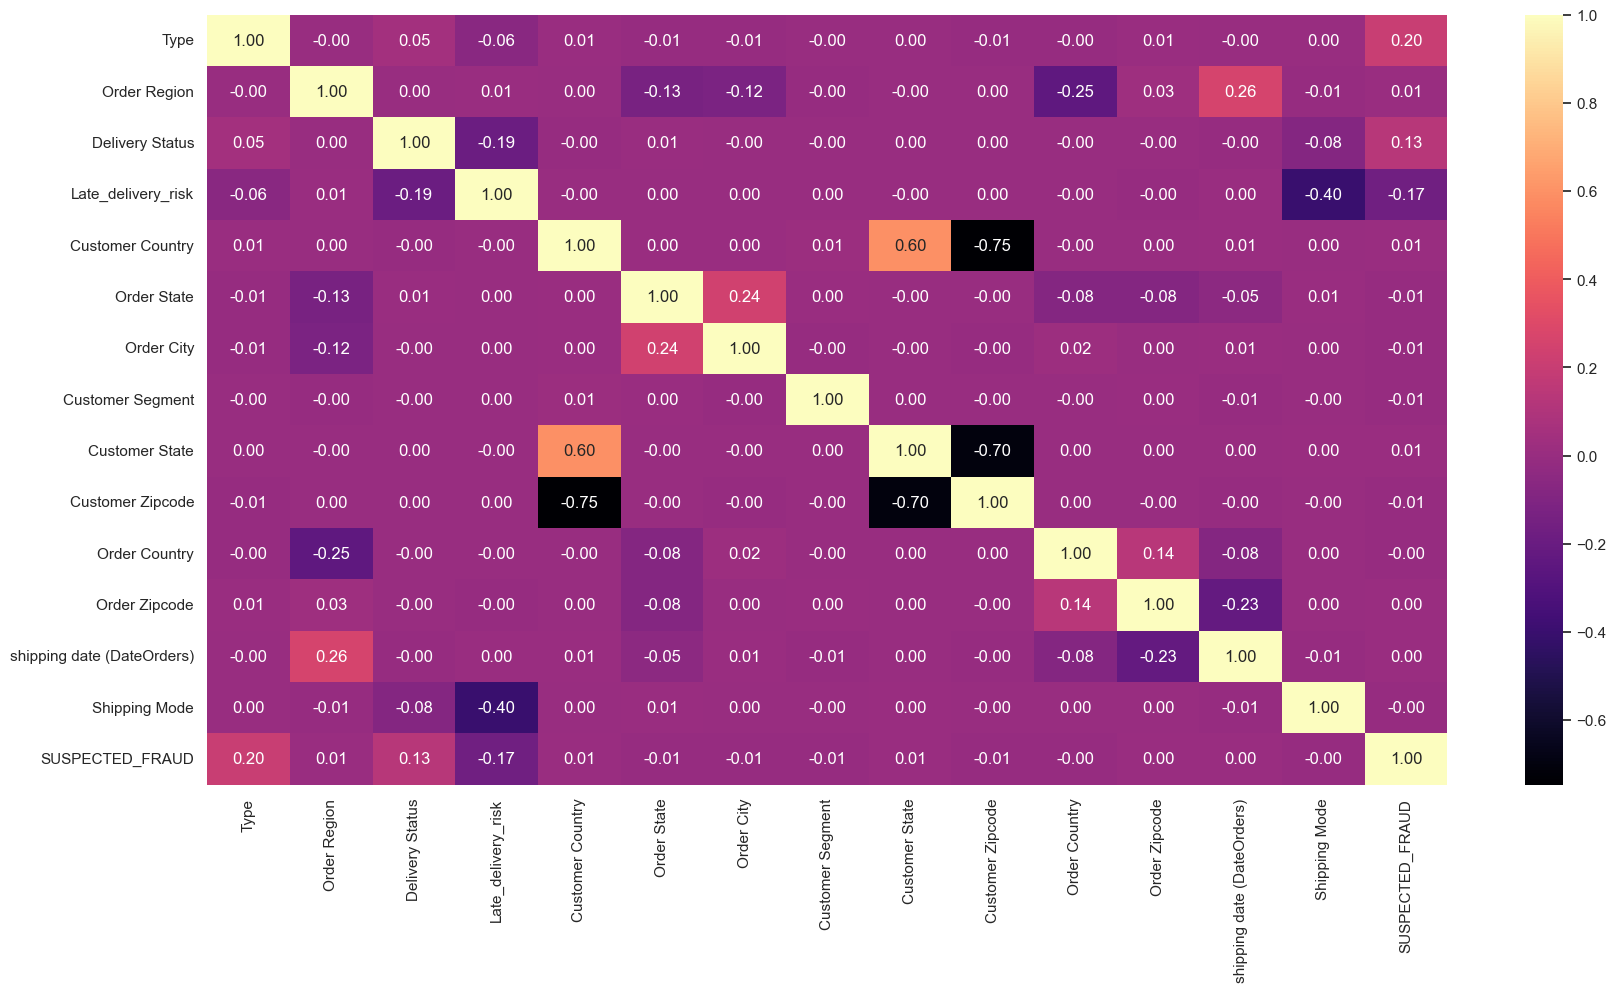

In [78]:
# Create a figure and set the size
fig = plt.figure(figsize=(20, 10))

# Plot the heatmap of the correlation matrix
sns.heatmap(final_data.corr(), annot=True, fmt='.2f', cmap='magma')

# Show the plot
plt.show()

In [79]:
# Create a new DataFrame by dropping 'Customer State' and 'Customer Zipcode' columns
final_features2 = final_features.drop(columns=['Customer State', 'Customer Zipcode'])


In [81]:
# Import necessary modules and classes
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import *
from sklearn import metrics
from sklearn.metrics import classification_report


In [82]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
# X_train: training features
# X_test: test features
# y_train: training target
# y_test: test target
X_train, X_test, y_train, y_test = train_test_split(final_features2, target, test_size=0.2, random_state=42)


In [89]:
# Create pipelines for different classifiers
lgr_pipline  = Pipeline([("scaler", StandardScaler()), ("LogisticRegression", LogisticRegression())])
rfc_pipline = Pipeline([("scaler", StandardScaler()), ("RandomForestClassifier", RandomForestClassifier())])
knn_pipline = Pipeline([("scaler", StandardScaler()), ("KNeighborsClassifier", KNeighborsClassifier())])
gnb_pipline = Pipeline([("scaler", StandardScaler()), ("GaussianNB", GaussianNB())])
sgd_pipline = Pipeline([("scaler", StandardScaler()), ("SGDClassifier", SGDClassifier())])
dt_pipline = Pipeline([("scaler", StandardScaler()), ("DecisionTreeClassifier", DecisionTreeClassifier())])


In [90]:
# Create a dictionary mapping pipeline indices to classifier names
pip_dict1 = {
    0: 'Logistic Regression',
    1: 'RandomForestClassifier',
    2: 'KNeighborsClassifier',
    3: 'GaussianNB',
    4: 'SGDClassifier',
    5: 'DecisionTreeClassifier'
}


In [93]:
piplines1=[lgr_pipline, rfc_pipline , knn_pipline, gnb_pipline  , sgd_pipline , dt_pipline ]

In [97]:
# Create an empty DataFrame to store model scores
scores_df = pd.DataFrame(columns = ["Model", "CVScores"])
for i, pipe in enumerate(piplines1):
    score = cross_val_score(pipe, final_features2, target, cv = 10)
    print(pip_dict1[i], ": ", score.mean())

Logistic Regression :  0.9764456985828234
RandomForestClassifier :  0.9916186007459501
KNeighborsClassifier :  0.9817637011135805
GaussianNB :  0.9795478562150082
SGDClassifier :  0.9774982135396149
DecisionTreeClassifier :  0.9930588874398673


In [98]:
grid_params = [
    {"classifier": [RandomForestClassifier()],
    "classifier__n_estimators": [50,100,150,200,250,300],
    "classifier__criterion": ["gini", "entropy"],
    "classifier__max_features": ["auto", "sqrt", "log2"],
    },
]

In [99]:
# Create a pipeline with scaler and classifier
pipeline_new = Pipeline([
    ("scaler", StandardScaler()),  # Apply feature scaling using StandardScaler
    ("classifier", RandomForestClassifier())  # Random Forest classifier
])

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=pipeline_new,  # Use the pipeline as the estimator
    param_distributions=grid_params,  # Use the defined grid search parameters
    scoring='neg_mean_absolute_error',  # Specify the evaluation metric
    n_jobs=-1,  # Use all available CPU cores
    cv=8,  # Perform 8-fold cross-validation
    verbose=10,  # Print detailed progress
    random_state=42  # Set random seed for reproducibility
)


In [100]:
# Fit the RandomizedSearchCV object to find the best model
best_model = random_search.fit(X_train, y_train)


Fitting 8 folds for each of 10 candidates, totalling 80 fits


/usr/local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning:


8 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/site-packages/sklearn/pipeline.py", line 420, in fit
    self._final_estimator.fit(Xt, y, **fit

In [101]:
# Access the best parameters found during the randomized search
best_params = best_model.best_params_

# Print the best parameters
print(best_params)


{'classifier__n_estimators': 100, 'classifier__max_features': 'log2', 'classifier__criterion': 'gini', 'classifier': RandomForestClassifier(max_features='log2')}


In [102]:
# Create a pipeline with scaler and Random Forest classifier
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),  # Apply feature scaling using StandardScaler
    ('Random Forest Classifier', RandomForestClassifier(
        criterion='entropy',  # Use entropy as the splitting criterion
        max_features='sqrt',  # Use the square root of the number of features
        n_estimators=150  # Use 150 decision trees in the forest
    ))
])

[CV 4/8; 1/10] START classifier=RandomForestClassifier(), classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=300
[CV 4/8; 1/10] END classifier=RandomForestClassifier(), classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=300;, score=-0.003 total time=  58.9s
[CV 5/8; 1/10] START classifier=RandomForestClassifier(), classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=300
[CV 5/8; 1/10] END classifier=RandomForestClassifier(), classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=300;, score=-0.003 total time=  50.5s
[CV 1/8; 2/10] START classifier=RandomForestClassifier(), classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=100
[CV 1/8; 2/10] END classifier=RandomForestClassifier(), classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=100;, score=-0.004 total time=  15.8s
[CV 5/8; 2/10] S

[CV 3/8; 4/10] START classifier=RandomForestClassifier(), classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=50
[CV 3/8; 4/10] END classifier=RandomForestClassifier(), classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=50;, score=-0.003 total time=   5.8s
[CV 7/8; 4/10] START classifier=RandomForestClassifier(), classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=50
[CV 7/8; 4/10] END classifier=RandomForestClassifier(), classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=50;, score=-0.004 total time=   6.1s
[CV 3/8; 5/10] START classifier=RandomForestClassifier(), classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=250
[CV 3/8; 5/10] END classifier=RandomForestClassifier(), classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=250;, score=-0.003 total time=  28.8s
[CV 7/8; 5/10] START